# Pesquisa em Mestrado Profisisonal - Dissertação de Jeferson Tadeu de Souza
## Analise dos dados dos questionários dos gestores de TI 
Este caderno tem por objetivo o tratamento dos dados dos questionários respondidos pelso gestores de TI .
Inicialmente este caderno foi construído para tratamento dos dados do questionário de gestores de TI 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer
from mpl_toolkits import mplot3d 
import seaborn as sns


In [ ]:
import scipy.stats  as st # import shapiro

In [ ]:
!pip install scikit-posthocs
#import prince

     |████████████████████████████████| 43 kB 1.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37902 sha256=bd9728d6e626e173382c371c42e084d36762458f0ca0a6011e8c76f778cf29dd
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


In [ ]:
regua = "==========================="
import scikit_posthocs as sp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import statistics
import plotly.express as px
from scipy import stats

In [ ]:
# permitindo lerd csv a partir do google drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhZGfIHHWBiEwdS35cp2S_bbyyiykk5tE0PUGrNcLrtViO8SK8OAKI
Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive/Datasets'

apenas_match.dataset			    Gestores_TI_V2.dataset
df_gestores_TI_filled2.gsheet		    Simplificado.dataset
Gestores_TI_iniciando_tratamento_2.dataset  Simplificado_v2.dataset
Gestores_TI_iniciando_tratamento.dataset


In [ ]:
def correlacao_variaveis(df_avaliado, var1, var2):
  print ('Relação entre ', var1, ' e ', var2 )
  r = stats.spearmanr(
                  np.array(df_avaliado[var1]), 
                  np.array(df_avaliado[var2]) )

  text = "correlação: {:.4f}, p-valor: {:.4f}".format(r.correlation, r.pvalue)
  print (text)
  print(regua)


In [ ]:
def compara_areas_anova(df_analisada, area_a_ser_apartada = 'educacao', variavel_dependente = 'avaliacao_geral_projeto'):
  #
  # comparação de ANOVA - para variaveis consideradas quantitativas
  #
  area_apartada = df_analisada[df_gestores_TI_filled2['area']==area_a_ser_apartada][variavel_dependente]
  demais_areas = df_analisada[df_gestores_TI_filled2['area']!=area_a_ser_apartada][variavel_dependente]

  print("Avaliando separadamente o atributo: ", variavel_dependente) 
  print(regua)
  print(regua)
  print(regua)
  print('avaliando comportamento normal')
  print("shapiro-wilk, apenas area de educacao", st.shapiro(area_apartada))
  print("shapiro-wilk, demais areas", st.shapiro(demais_areas))
  print(regua)
  print('avaliando igualdade de varianças por teste de Levene')
  print(st.levene(area_apartada,demais_areas))

  print(regua)
  print(regua)
  print("\n")
  print('descritivo apenas da area de '+area_a_ser_apartada )
  print(area_apartada.describe())
  print("\n")
  print('descritivo apenas da area de '+area_a_ser_apartada)
  print(demais_areas.describe())
  print(regua)
  anova_stats, anova_pvalue= st.f_oneway(area_apartada,demais_areas)

  if anova_pvalue > 0.05:
    print('os dois conjuntos apresentam, em média,  similaridade de  valores ')
    print('pvalor', anova_pvalue)
  else:
    print('os dois conjuntos não apresentam, em média, similaridade de valores')
    print('pvalor', anova_pvalue)
    #teste de tukey


In [ ]:
def compara_areas_kruskall(df_analisada, area_a_ser_apartada = 'educacao', variavel_dependente = 'avaliacao_geral_projeto'):
  #
  # comparação de ANOVA - para variaveis consideradas quantitativas
  #
  area_apartada = df_analisada[df_gestores_TI_filled2['area']==area_a_ser_apartada][variavel_dependente]
  demais_areas = df_analisada[df_gestores_TI_filled2['area']!=area_a_ser_apartada][variavel_dependente]
  print("Avaliando separadamente o atributo") 
  print(regua)
  print(regua)
  print("\n")
  print('descritivo apenas da area de '+area_a_ser_apartada )
  print(area_apartada.describe())
  print("\n")
  print('descritivo apenas da area de '+area_a_ser_apartada)
  print(demais_areas.describe())
  print(regua)
  print(regua)
  kruskal_stats, kruskal_pvalue= st.kruskal(area_apartada,demais_areas)
  print('teste de kruskal', ' stats=', kruskal_stats,' pvalor=', kruskal_pvalue )
  if kruskal_pvalue > 0.05:
    print('os dois conjuntos apresentam, em média,  similaridade de  valores ')
  else:
    print('os dois conjuntos apresentam, em média, DIFERENÇA entre seus valores')

    #teste de dunn
    print('Aplicando teste de dunn - area_apartada, demais_areas')
    print(sp.posthoc_dunn([area_apartada,demais_areas], p_adjust = 'bonferroni'))



In [ ]:
df_gestores_TI = pd.read_csv('/content/drive/MyDrive/Datasets/Gestores_TI_iniciando_tratamento_2.dataset')
df_gestores_TI.head(10)

id      area  ... numero_das pressao_por_prazos
0   1  educacao  ...       -1.0                1.0
1   2    outros  ...       -1.0                1.0
2   3  educacao  ...       -1.0               -1.0
3   4    outros  ...       -1.0                1.0
4   5  educacao  ...       -1.0                1.0
5   6    outros  ...       -1.0                0.0
6   7  economia  ...       -1.0               -1.0
7   8  educacao  ...        NaN                0.0
8   9  educacao  ...       -1.0                1.0
9  10  educacao  ...        NaN                0.0

[10 rows x 29 columns]

## Tratando dos dados faltantes (missing datas) 

<Figure size 360x360 with 0 Axes>

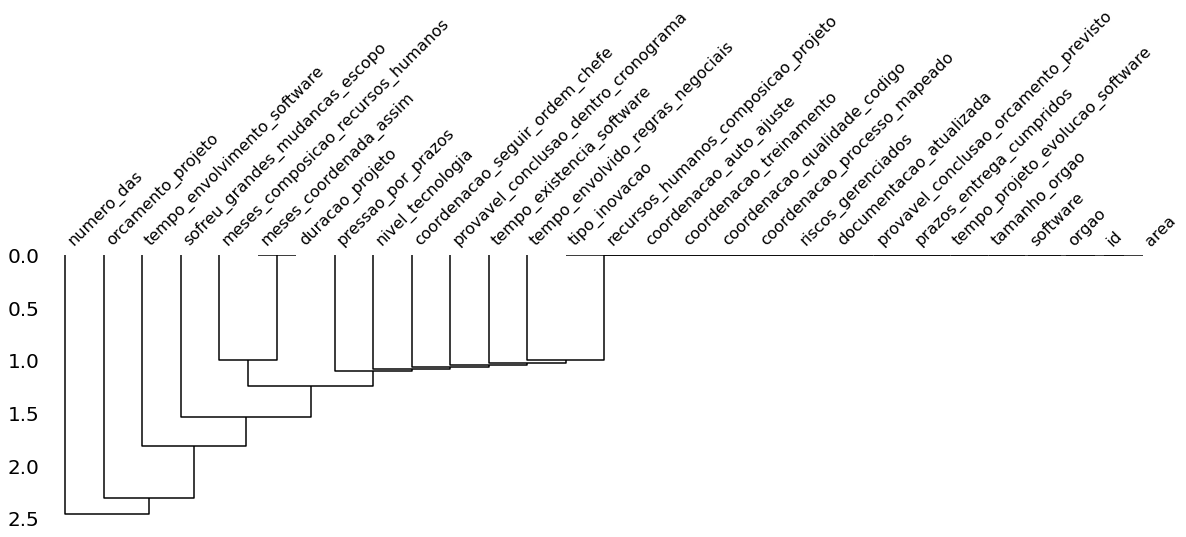

In [ ]:
plt.figure(figsize=(5,5))
#msno.matrix(df_gestores_TI)
msno.dendrogram(df_gestores_TI, figsize=(20, 5))

In [ ]:
df_gestores_TI.isnull().sum(axis = 0)

id                                       0
area                                     0
orgao                                    0
software                                 0
tamanho_orgao                            0
tempo_envolvido_regras_negociais         1
tempo_envolvimento_software              3
tempo_existencia_software                1
tempo_projeto_evolucao_software          0
prazos_entrega_cumpridos                 0
provavel_conclusao_dentro_cronograma     1
provavel_conclusao_orcamento_previsto    0
sofreu_grandes_mudancas_escopo           2
documentacao_atualizada                  0
riscos_gerenciados                       0
coordenacao_seguir_ordem_chefe           1
coordenacao_processo_mapeado             0
coordenacao_qualidade_codigo             0
coordenacao_treinamento                  0
coordenacao_auto_ajuste                  0
meses_coordenada_assim                   1
nivel_tecnologia                         1
orcamento_projeto                        5
duracao_pro

In [ ]:
df_gestores_TI.isnull().sum(axis = 1).sort_values(ascending=False)

127    5
86     3
125    2
46     2
7      2
      ..
87     0
88     0
89     0
90     0
0      0
Length: 128, dtype: int64

In [ ]:
df_gestores_TI.isnull().sum(axis = 1).sum()

26

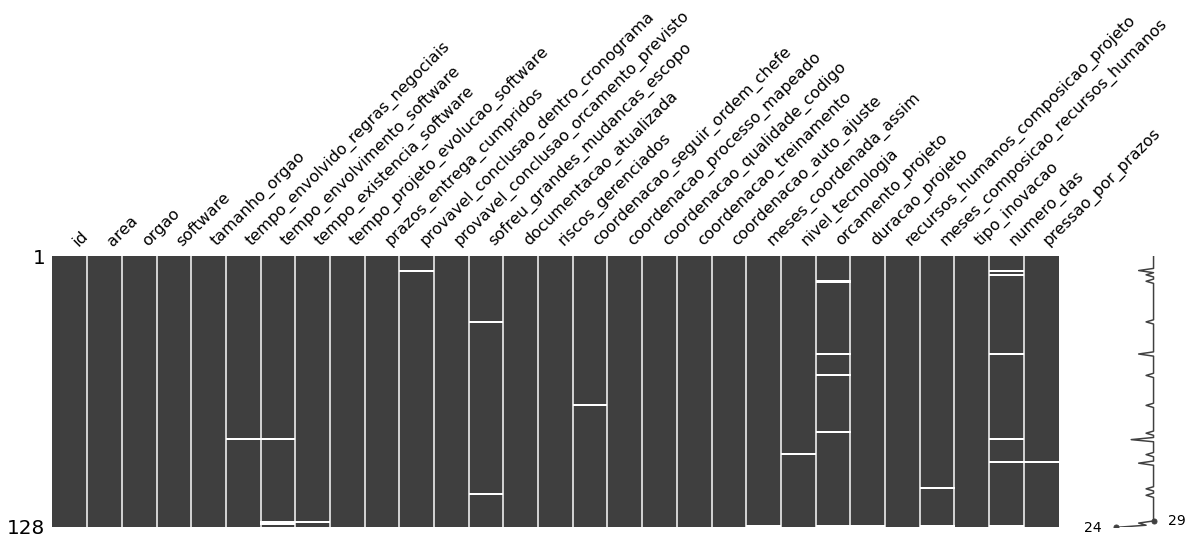

In [ ]:
msno.matrix(df_gestores_TI, figsize=(20, 5))

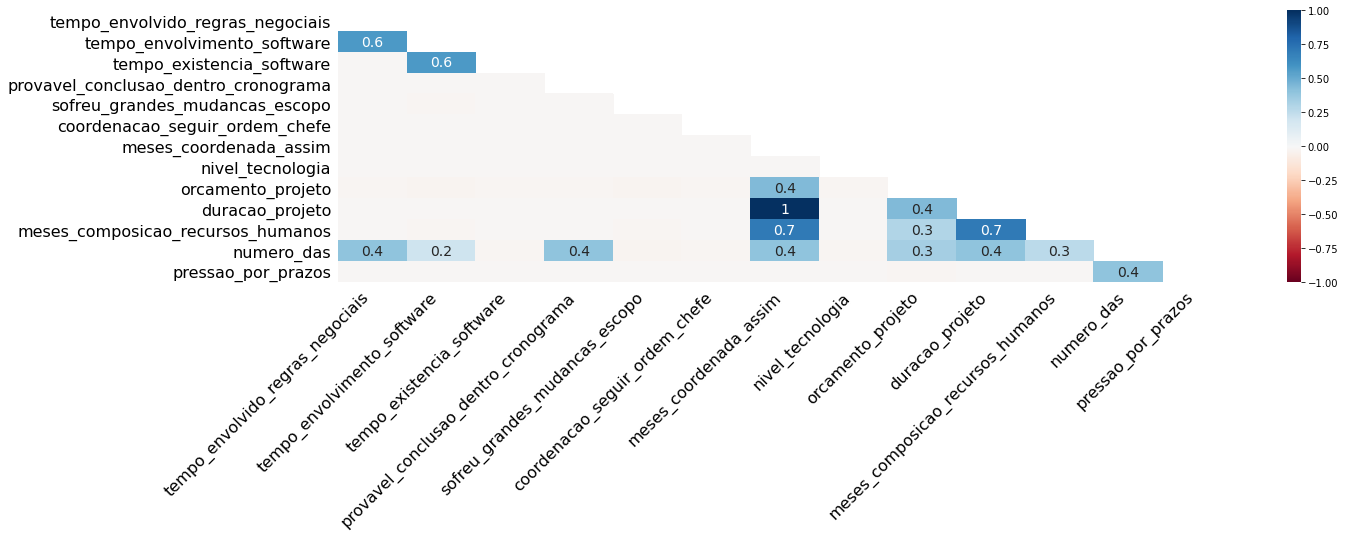

In [ ]:
msno.heatmap(df_gestores_TI, figsize=(20, 5))

In [ ]:
#empregando 'tecnica de knn para preenchimento de dados faltantes '
imputer = KNNImputer(n_neighbors=3)
array_filled = imputer.fit_transform(df_gestores_TI.iloc[:,4:])
df_gestores_TI_filled = pd.DataFrame(array_filled, columns=list(df_gestores_TI.iloc[:,4:].columns)).astype('int32')
df_gestores_TI_filled2 =  pd.concat([df_gestores_TI.iloc[:,:4], df_gestores_TI_filled ], axis=1)

In [ ]:
df_gestores_TI_filled2.describe()
#dataprep python


id  tamanho_orgao  ...  numero_das  pressao_por_prazos
count  128.000000     128.000000  ...  128.000000          128.000000
mean    64.500000       1.835938  ...   -0.757812            0.093750
std     37.094474       0.598914  ...    0.571586            0.669204
min      1.000000       1.000000  ...   -1.000000           -1.000000
25%     32.750000       1.000000  ...   -1.000000            0.000000
50%     64.500000       2.000000  ...   -1.000000            0.000000
75%     96.250000       2.000000  ...   -1.000000            1.000000
max    128.000000       3.000000  ...    1.000000            1.000000

[8 rows x 26 columns]

In [ ]:
df_gestores_TI_filled2['soft_categoria'] = df_gestores_TI_filled2.software.astype("category").cat.codes
df_gestores_TI_filled2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     128 non-null    int64 
 1   area                                   128 non-null    object
 2   orgao                                  128 non-null    object
 3   software                               128 non-null    object
 4   tamanho_orgao                          128 non-null    int32 
 5   tempo_envolvido_regras_negociais       128 non-null    int32 
 6   tempo_envolvimento_software            128 non-null    int32 
 7   tempo_existencia_software              128 non-null    int32 
 8   tempo_projeto_evolucao_software        128 non-null    int32 
 9   prazos_entrega_cumpridos               128 non-null    int32 
 10  provavel_conclusao_dentro_cronograma   128 non-null    int32 
 11  provavel_conclusao_

In [ ]:
#teste sem a educacao
#df_gestores_TI_filled2 = df_gestores_TI_filled2[df_gestores_TI_filled2['area']!='educacao']
likert_scale = {'educacao':0, 'agencia':1, 'defesa_e_militar':2, 'economia':3,  'empresa_publica': 4, 'outros': 5, 'presidencia': 6 , 'saude' : 7 , 'seguranca_publica': 8}
df_gestores_TI_filled2['categoria_area'] = df_gestores_TI_filled2.area.apply(lambda x: likert_scale[x])


<h2> Dimensão Avaliação de Projetos </h2>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



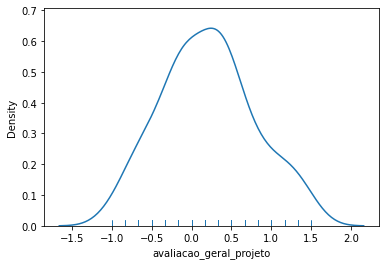

In [ ]:
# DIMENSÃO AVALIAÇÃO DE PROJETOS (MENOS BEM AVALIADOS  <-> MAIS BEM AVALIADOS)
composicao_avaliacao_geral_projeto = ['prazos_entrega_cumpridos', 'provavel_conclusao_dentro_cronograma', 'provavel_conclusao_orcamento_previsto', 'sofreu_grandes_mudancas_escopo', 'documentacao_atualizada', 'riscos_gerenciados']
df_gestores_TI_filled2['avaliacao_geral_projeto']  = df_gestores_TI_filled2[composicao_avaliacao_geral_projeto].mean(axis=1)
df_gestores_TI_filled2['dimensao_categoria_sucesso_projeto']  = pd.qcut(df_gestores_TI_filled2['avaliacao_geral_projeto'], 2, [0,1]).astype('int')
sns.distplot(df_gestores_TI_filled2['avaliacao_geral_projeto'], rug=True, hist=False, bins=10)  #.set(xlim=(1,4))
#plt.boxplot(df_gestores_TI_filled2['dimensao_categoria_sucesso_projeto'], patch_artist=True)
 


In [ ]:
df_gestores_TI_filled2['avaliacao_geral_projeto'].describe()

count    128.000000
mean       0.203125
std        0.579973
min       -1.000000
25%       -0.166667
50%        0.166667
75%        0.500000
max        1.500000
Name: avaliacao_geral_projeto, dtype: float64

In [ ]:
st.shapiro(df_gestores_TI_filled2['avaliacao_geral_projeto'])
#st.normaltest(df_gestores_TI_filled2['avaliacao_geral_projeto'])
#composicao_avaliacao_geral_projeto

(0.9795536994934082, 0.05005263537168503)

In [ ]:
compara_areas_anova(df_gestores_TI_filled2,'educacao','avaliacao_geral_projeto')

Avaliando separadamente o atributo:  avaliacao_geral_projeto
avaliando comportamento normal
shapiro-wilk, apenas area de educacao (0.9742540121078491, 0.20064663887023926)
shapiro-wilk, demais areas (0.9735413193702698, 0.1844886839389801)
avaliando igualdade de varianças por teste de Levene
LeveneResult(statistic=0.47393476344402036, pvalue=0.4924481073810042)


descritivo apenas da area de educacao
count    64.000000
mean      0.174479
std       0.555896
min      -1.000000
25%      -0.166667
50%       0.166667
75%       0.500000
max       1.333333
Name: avaliacao_geral_projeto, dtype: float64


descritivo apenas da area de educacao
count    64.000000
mean      0.231771
std       0.606125
min      -1.000000
25%      -0.166667
50%       0.250000
75%       0.500000
max       1.500000
Name: avaliacao_geral_projeto, dtype: float64
os dois conjuntos apresentam, em média,  similaridade de  valores 
pvalor 0.5783216612111775


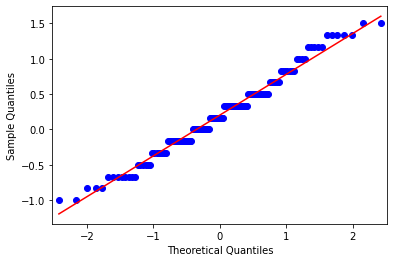

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(df_gestores_TI_filled2['avaliacao_geral_projeto'], line='s')
pyplot.show()

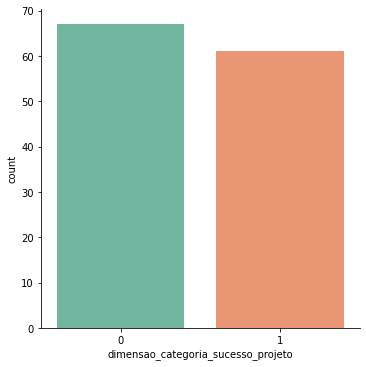

In [ ]:
sns.catplot(x='dimensao_categoria_sucesso_projeto', kind="count",  data=df_gestores_TI_filled2, palette="Set2") 

In [ ]:
df_gestores_TI_filled2[['id','dimensao_categoria_sucesso_projeto']].groupby('dimensao_categoria_sucesso_projeto').agg('count') 

id
dimensao_categoria_sucesso_projeto    
0                                   67
1                                   61

In [ ]:
#from google.colab import files
#df_gestores_TI_filled2.to_excel("df_gestores_TI_filled2.xlsx")  
#files.download('df_gestores_TI_filled2.xlsx')

<h2> DIMENSÃO COORDENAÇÃO DE TIMES </h2>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



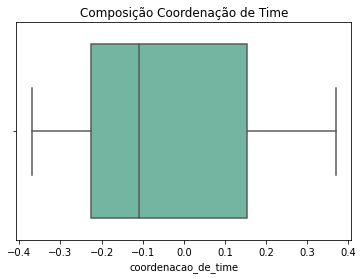

In [ ]:
# DIMENSÃO COORDENAÇÃO DE  TIMES (CENTRALIZACAO  <-> DESCENTRALIZAÇÃO)

#from dataprep.eda import *
#plot(df_gestores_TI_filled2)
df_gestores_TI_filled2['coordenacao_de_time'] = \
( \
((1 / df_gestores_TI_filled2['coordenacao_seguir_ordem_chefe'])*-2) + \
((1 / df_gestores_TI_filled2['coordenacao_processo_mapeado'])*-1) + \
((1 / df_gestores_TI_filled2['coordenacao_qualidade_codigo'])*0) + \
((1 / df_gestores_TI_filled2['coordenacao_treinamento'])*1) +  \
((1 / df_gestores_TI_filled2['coordenacao_auto_ajuste'])*2) \
) / 5
df_gestores_TI_filled2['dimensao_coordenacao_de_time'] = pd.qcut(df_gestores_TI_filled2['coordenacao_de_time'], 5, [-2,-1,0,1,2]).astype('int')
#sns.catplot(x='dimensao_coordenacao_de_time', kind="count",  data=df_gestores_TI_filled2) 

plt.title("Composição Coordenação de Time")
ax = sns.boxplot(df_gestores_TI_filled2['coordenacao_de_time'], orient="h", palette="Set2")

In [ ]:
df_gestores_TI_filled2['coordenacao_de_time'].describe()  #.set(xlim=(1,4))

count    128.000000
mean      -0.055260
std        0.217134
min       -0.370000
25%       -0.226667
50%       -0.108333
75%        0.153333
max        0.370000
Name: coordenacao_de_time, dtype: float64

In [ ]:
compara_areas_kruskall(df_gestores_TI_filled2,'educacao','coordenacao_de_time')

Avaliando separadamente o atributo


descritivo apenas da area de educacao
count    64.000000
mean     -0.074375
std       0.201367
min      -0.370000
25%      -0.226667
50%      -0.113333
75%       0.053333
max       0.353333
Name: coordenacao_de_time, dtype: float64


descritivo apenas da area de educacao
count    64.000000
mean     -0.036146
std       0.231843
min      -0.360000
25%      -0.254167
50%      -0.096667
75%       0.153333
max       0.370000
Name: coordenacao_de_time, dtype: float64
teste de kruskal  stats= 0.5639398807819028  pvalor= 0.45267714614019994
os dois conjuntos apresentam, em média,  similaridade de  valores 


Text(0.5, 1.0, '\nFrequência de Prioridade dos Tipos de Coordenação\n')

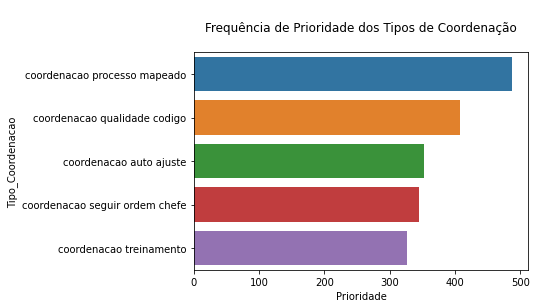

In [ ]:
teste = df_gestores_TI_filled2[['coordenacao_seguir_ordem_chefe','coordenacao_processo_mapeado','coordenacao_qualidade_codigo','coordenacao_treinamento','coordenacao_auto_ajuste']]
teste = (teste -6) * -1
teste['id'] = df_gestores_TI_filled2['id']
teste2 = teste.melt(id_vars=["id"],  var_name="Tipo_Coordenacao", value_name="Prioridade")
teste2 = teste2.groupby(['Tipo_Coordenacao'])[['Prioridade']].agg('sum').sort_values(by='Prioridade', ascending=False).reset_index()
teste2[['Tipo_Coordenacao']] = teste2[['Tipo_Coordenacao']].replace({'coordenacao_processo_mapeado': 'coordenacao processo mapeado', 'coordenacao_qualidade_codigo':'coordenacao qualidade codigo', 'coordenacao_auto_ajuste':'coordenacao auto ajuste','coordenacao_seguir_ordem_chefe': 'coordenacao seguir ordem chefe', 'coordenacao_treinamento':'coordenacao treinamento' })
g = sns.barplot(y="Tipo_Coordenacao", x="Prioridade", orient="h", data=teste2)
g.set_title("\nFrequência de Prioridade dos Tipos de Coordenação\n")

In [ ]:
# DIMENSÃO COORDENAÇÃO NÍVEL DE TERCEIRIZACAO (APROPRIADO  <-> TERCEIRIZADO)
df_gestores_TI_filled2['dimensao_recursos_humanos_composicao_projeto'] = df_gestores_TI_filled2['recursos_humanos_composicao_projeto'].astype('int')

In [ ]:
df_gestores_TI_filled2[['id','dimensao_recursos_humanos_composicao_projeto']].groupby('dimensao_recursos_humanos_composicao_projeto').agg('count') 


id
dimensao_recursos_humanos_composicao_projeto    
-2                                            68
-1                                            32
 0                                            21
 1                                             4
 2                                             2
 3                                             1

Text(0.5, 1.0, 'Tipos de Recursos Utilizados')

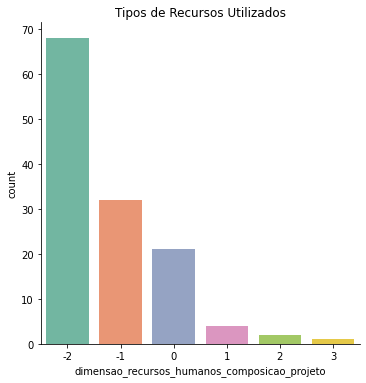

In [ ]:
g = sns.catplot(x='dimensao_recursos_humanos_composicao_projeto', kind="count", data=df_gestores_TI_filled2,palette="Set2" ) 
g.ax.set_title("Tipos de Recursos Utilizados")

In [ ]:
compara_areas_kruskall(df_gestores_TI_filled2,'educacao','recursos_humanos_composicao_projeto')

Avaliando separadamente o atributo


descritivo apenas da area de educacao
count    64.000000
mean     -1.703125
std       0.727677
min      -2.000000
25%      -2.000000
50%      -2.000000
75%      -2.000000
max       2.000000
Name: recursos_humanos_composicao_projeto, dtype: float64


descritivo apenas da area de educacao
count    64.000000
mean     -0.750000
std       1.054093
min      -2.000000
25%      -1.250000
50%      -1.000000
75%       0.000000
max       3.000000
Name: recursos_humanos_composicao_projeto, dtype: float64
teste de kruskal  stats= 37.58259307900986  pvalor= 8.762295368690475e-10
os dois conjuntos apresentam, em média, DIFERENÇA entre seus valores
Aplicando teste de dunn - area_apartada, demais_areas
              1             2
1  1.000000e+00  8.762295e-10
2  8.762295e-10  1.000000e+00


Text(0.5, 1.0, 'Tipos de Recursos Utilizados')

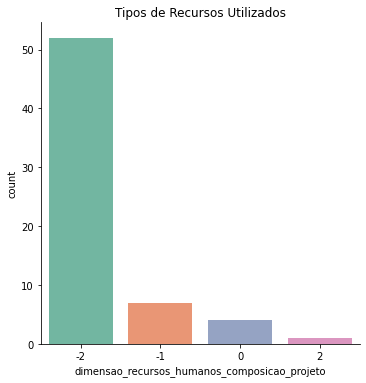

In [ ]:
#plt.title("Composição Coordenação de Time")
#ax = sns.boxplot(df_gestores_TI_filled2['dimensao_recursos_humanos_composicao_projeto'], orient="h", palette="Set2")

g = sns.catplot(x='dimensao_recursos_humanos_composicao_projeto', kind="count", data=df_gestores_TI_filled2[df_gestores_TI_filled2['area']=='educacao'],palette="Set2" ) 
g.ax.set_title("Tipos de Recursos Utilizados")

Text(0.5, 1.0, 'Tipos de Recursos Utilizados')

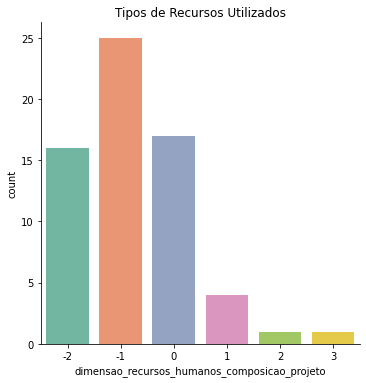

In [ ]:
g = sns.catplot(x='dimensao_recursos_humanos_composicao_projeto', kind="count", data=df_gestores_TI_filled2[df_gestores_TI_filled2['area']!='educacao'],palette="Set2" ) 
g.ax.set_title("Tipos de Recursos Utilizados")

In [ ]:
teste3 = df_gestores_TI_filled2[df_gestores_TI_filled2['area']!='educacao']
teste3 = teste3[['dimensao_recursos_humanos_composicao_projeto','id']].melt(id_vars=["id"],  var_name="fator", value_name="tipo_recurso")
teste3.groupby(['tipo_recurso']).agg('count').sort_values(by='id', ascending=False).reset_index()



tipo_recurso  id  fator
0            -1  25     25
1             0  17     17
2            -2  16     16
3             1   4      4
4             2   1      1
5             3   1      1

In [ ]:
# DIMENSÃO COMPLEXIDADE DE PROJETOS
#avaliando se há diferenças entre a complexidade de projetos da educação e de demais áreas
teste_complexidade = pd.concat([df_gestores_TI_filled2['area'], df_gestores_TI_filled2[['nivel_tecnologia', 'orcamento_projeto', 'duracao_projeto','tipo_inovacao', 'numero_das', 'pressao_por_prazos']].mean(axis=1)], axis=1)
compara_areas_kruskall(teste_complexidade,'educacao',0)


Avaliando separadamente o atributo


descritivo apenas da area de educacao
count    64.000000
mean      0.057292
std       0.254100
min      -0.500000
25%      -0.166667
50%       0.000000
75%       0.208333
max       0.666667
Name: 0, dtype: float64


descritivo apenas da area de educacao
count    64.000000
mean      0.111979
std       0.339954
min      -0.500000
25%      -0.166667
50%       0.000000
75%       0.333333
max       1.000000
Name: 0, dtype: float64
teste de kruskal  stats= 0.41809868856600757  pvalor= 0.5178872895156847
os dois conjuntos apresentam, em média,  similaridade de  valores 


Text(0.5, 1.0, 'Complexidade de Projeto')

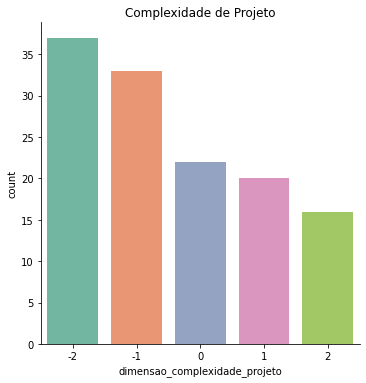

In [ ]:
# DIMENSÃO COMPLEXIDADE DE PROJETOS
df_gestores_TI_filled2['dimensao_complexidade_projeto'] = pd.qcut( df_gestores_TI_filled2[['nivel_tecnologia', 'orcamento_projeto', 'duracao_projeto','tipo_inovacao', 'numero_das', 'pressao_por_prazos']].mean(axis=1), 5, [-2,-1,0,1,2]).astype('int')
teste = pd.qcut( df_gestores_TI_filled2[['nivel_tecnologia', 'orcamento_projeto', 'duracao_projeto','tipo_inovacao', 'numero_das', 'pressao_por_prazos']].mean(axis=1), 5, [-2,-1,0,1,2]).astype('category')
teste = pd.DataFrame(teste, columns=['dimensao_complexidade_projeto'])
g = sns.catplot(x='dimensao_complexidade_projeto', kind="count", data=teste,palette="Set2" ) 
g.ax.set_title("Complexidade de Projeto")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



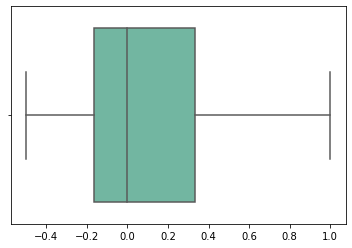

In [ ]:
ax = sns.boxplot(df_gestores_TI_filled2[['nivel_tecnologia', 'orcamento_projeto', 'duracao_projeto','tipo_inovacao', 'numero_das', 'pressao_por_prazos']].mean(axis=1), orient="h", palette="Set2")

In [ ]:
df_gestores_TI_filled2[['nivel_tecnologia', 'orcamento_projeto', 'duracao_projeto','tipo_inovacao', 'numero_das', 'pressao_por_prazos']].mean(axis=1).describe()

count    128.000000
mean       0.084635
std        0.300187
min       -0.500000
25%       -0.166667
50%        0.000000
75%        0.333333
max        1.000000
dtype: float64

In [ ]:
#teste.reset_index(inplace=True)
#teste[['index','dimensao_complexidade_projeto']].groupby('dimensao_complexidade_projeto').agg('count') 
#df_gestores_TI_filled2['dimensao_complexidade_projeto']
df_gestores_TI_filled2[['id','dimensao_complexidade_projeto']].groupby('dimensao_complexidade_projeto').agg('count') 

id
dimensao_complexidade_projeto    
-2                             37
-1                             33
 0                             22
 1                             20
 2                             16

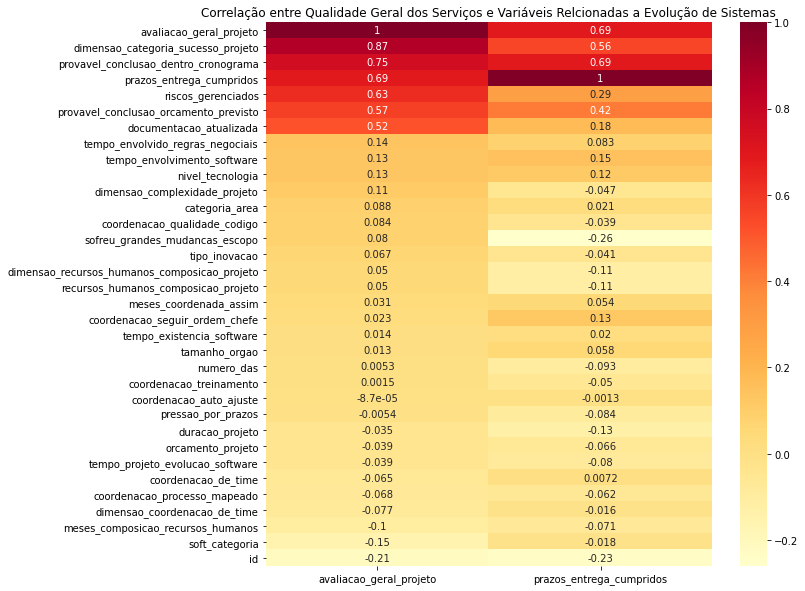

avaliacao_geral_projeto  prazos_entrega_cumpridos
avaliacao_geral_projeto                                      1.000000                  0.688892
dimensao_categoria_sucesso_projeto                           0.868884                  0.555812
provavel_conclusao_dentro_cronograma                         0.754850                  0.690767
prazos_entrega_cumpridos                                     0.688892                  1.000000
riscos_gerenciados                                           0.629676                  0.292554
provavel_conclusao_orcamento_previsto                        0.568132                  0.415836
documentacao_atualizada                                      0.521071                  0.176369
tempo_envolvido_regras_negociais                             0.141873                  0.083053
tempo_envolvimento_software                                  0.131178                  0.152852
nivel_tecnologia                                             0.129812                  0.116442
dimensao_complexidade_projeto                                0.113239                 -0.047450
categoria_area                                               0.087883                  0.021273
coordenacao_qualidade_codigo                                 0.083617                 -0.039454
sofreu_grandes_mudancas_escopo                               0.079864                 -0.260288
tipo_inovacao                                                0.066691                 -0.041079
dimensao_recursos_humanos_composicao_projeto                 0.050231                 -0.111606
recursos_humanos_composicao_projeto                          0.050231                 -0.111606
meses_coordenada_assim                                       0.030728                  0.054297
coordenacao_seguir_ordem_chefe                               0.023424                  0.127465
tempo_existencia_software                                    0.013770                  0.019819
tamanho_orgao                                                0.013140                  0.058067
numero_das                                                   0.005322                 -0.093169
coordenacao_treinamento                                      0.001484                 -0.049717
coordenacao_auto_ajuste                                     -0.000087                 -0.001287
pressao_por_prazos                                          -0.005387                 -0.083739
duracao_projeto                                             -0.035459                 -0.130981
orcamento_projeto                                           -0.039129                 -0.065506
tempo_projeto_evolucao_software                             -0.039195                 -0.080443
coordenacao_de_time                                         -0.064674                  0.007192
coordenacao_processo_mapeado                                -0.068470                 -0.061973
dimensao_coordenacao_de_time                                -0.077371                 -0.016106
meses_composicao_recursos_humanos                           -0.101626                 -0.071228
soft_categoria                                              -0.152551                 -0.018206
id                                                          -0.213230                 -0.233087

In [ ]:
df_corr = df_gestores_TI_filled2.corr(method='spearman')
x = df_corr[['avaliacao_geral_projeto','prazos_entrega_cumpridos']].sort_values(by='avaliacao_geral_projeto', ascending=False)

plt.figure(figsize=(10,10))
plt.title('Correlação entre Qualidade Geral dos Serviços e Variáveis Relcionadas a Evolução de Sistemas')
sns.heatmap(x,cmap='YlOrRd', annot=True)
plt.show()
x

In [ ]:
for column in df_gestores_TI_filled2:
    correlacao_variaveis(df_gestores_TI_filled2, 'avaliacao_geral_projeto', column)

Relação entre  avaliacao_geral_projeto  e  id
correlação: -0.2132, p-valor: 0.0157
Relação entre  avaliacao_geral_projeto  e  area
correlação: 0.1377, p-valor: 0.1211
Relação entre  avaliacao_geral_projeto  e  orgao
correlação: 0.0280, p-valor: 0.7540
Relação entre  avaliacao_geral_projeto  e  software
correlação: -0.1526, p-valor: 0.0856
Relação entre  avaliacao_geral_projeto  e  tamanho_orgao
correlação: 0.0131, p-valor: 0.8830
Relação entre  avaliacao_geral_projeto  e  tempo_envolvido_regras_negociais
correlação: 0.1419, p-valor: 0.1102
Relação entre  avaliacao_geral_projeto  e  tempo_envolvimento_software
correlação: 0.1312, p-valor: 0.1400
Relação entre  avaliacao_geral_projeto  e  tempo_existencia_software
correlação: 0.0138, p-valor: 0.8774
Relação entre  avaliacao_geral_projeto  e  tempo_projeto_evolucao_software
correlação: -0.0392, p-valor: 0.6605
Relação entre  avaliacao_geral_projeto  e  prazos_entrega_cumpridos
correlação: 0.6889, p-valor: 0.0000
Relação entre  avaliacao_g

In [ ]:
df_apenas_match = pd.read_csv('/content/drive/MyDrive/Datasets/apenas_match.dataset')
df_apenas_match.head(30)

Qualidade  tamanho_orgao  ...  numero_DAS  pressao_por_prazos
0        -0.5              2  ...          -1                   0
1         1.0              1  ...          -1                   1
2         0.5              2  ...           0                   0
3        -1.5              1  ...          -1                   1
4         2.0              2  ...          -1                   0
5         0.5              3  ...           1                   1
6         2.0              2  ...          -1                  -1
7         2.0              2  ...          -1                   0
8         2.0              1  ...          -1                   0
9         0.0              2  ...           1                   0
10        0.0              2  ...           0                   0
11        1.0              1  ...          -1                   0
12        1.0              1  ...          -1                   1
13        1.0              2  ...          -1                   0
14        1.0              3  ...           0                   0
15        1.0              1  ...          -1                   0
16        1.0              3  ...           0                  -1
17        0.0              2  ...          -1                   0
18        2.0              3  ...          -1                   0
19        0.0              2  ...          -1                   0
20        0.2              2  ...          -1                  -1
21        0.5              2  ...          -1                   0

[22 rows x 26 columns]

In [ ]:
for column in df_apenas_match:
    correlacao_variaveis(df_apenas_match, 'Qualidade', column)

Relação entre  Qualidade  e  Qualidade
correlação: 1.0000, p-valor: 0.0000
Relação entre  Qualidade  e  tamanho_orgao
correlação: 0.0206, p-valor: 0.9276
Relação entre  Qualidade  e  tempo_envolvido_regras_negociais
correlação: 0.4843, p-valor: 0.0224
Relação entre  Qualidade  e  tempo_envolvimento_software
correlação: 0.5586, p-valor: 0.0069
Relação entre  Qualidade  e  tempo_existencia_software
correlação: 0.0214, p-valor: 0.9246
Relação entre  Qualidade  e  tempo_projeto_evolucao_software
correlação: 0.2112, p-valor: 0.3454
Relação entre  Qualidade  e  prazos_entrega_cumpridos
correlação: 0.3806, p-valor: 0.0806
Relação entre  Qualidade  e  provavel_conclusao_dentro_cronograma
correlação: 0.3779, p-valor: 0.0829
Relação entre  Qualidade  e  provavel_conclusao_orcamento_previsto
correlação: 0.4333, p-valor: 0.0440
Relação entre  Qualidade  e  sofreu_grandes_mudancas_escopo
correlação: -0.0205, p-valor: 0.9278
Relação entre  Qualidade  e  documentacao_atualizada
correlação: 0.2297, p-

In [ ]:
plt.figure(figsize=(30,10))
fig = px.scatter_3d(df_gestores_TI_filled2, x='dimensao_coordenacao_de_time', y='dimensao_recursos_humanos_composicao_projeto', z='dimensao_complexidade_projeto', color='dimensao_categoria_sucesso_projeto' , color_continuous_scale='earth'  ) #, )symbol='tipo_inovacao'
fig.update_traces(marker={'size': 4})                    

fig.show()

<Figure size 2160x720 with 0 Axes>

In [ ]:
df_gestores_TI_filled2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            128 non-null    int64  
 1   area                                          128 non-null    object 
 2   orgao                                         128 non-null    object 
 3   software                                      128 non-null    object 
 4   tamanho_orgao                                 128 non-null    int32  
 5   tempo_envolvido_regras_negociais              128 non-null    int32  
 6   tempo_envolvimento_software                   128 non-null    int32  
 7   tempo_existencia_software                     128 non-null    int32  
 8   tempo_projeto_evolucao_software               128 non-null    int32  
 9   prazos_entrega_cumpridos                      128 non-null    int

<h2> Avaliando apenas os projetos que deram 'match' entre clientes internos e gestores de TI </h2>

In [ ]:
df_apenas_match['coordenacao_de_time'] = \
( \
((1 / df_apenas_match['coordenacao_seguir_ordem_chefe'])*-2) + \
((1 / df_apenas_match['coordenacao_processo_mapeado'])*-1) + \
((1 / df_apenas_match['coordenacao_qualidade_codigo'])*0) + \
((1 / df_apenas_match['coordenacao_treinamento'])*1) +  \
((1 / df_apenas_match['coordenacao_auto_ajuste'])*2) \
) / 5
df_apenas_match['dimensao_coordenacao_de_time'] = pd.qcut(df_apenas_match['coordenacao_de_time'], 5, [-2,-1,0,1,2]).astype('int')

In [ ]:
df_apenas_match['dimensao_complexidade_projeto'] = pd.qcut( df_apenas_match[['nivel_tecnologia', 'orcamento_projeto', 'duracao_projeto','tipo_inovacao', 'numero_DAS', 'pressao_por_prazos']].mean(axis=1).rank(method='first'), 5, [-2,-1,0,1,2]).astype('int')
df_apenas_match['dimensao_recursos_humanos_composicao_projeto'] = df_apenas_match['recursos_humanos_composicao_projeto'].astype('int')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



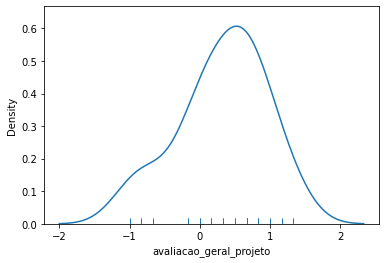

In [ ]:
composicao_avaliacao_geral_projeto = ['prazos_entrega_cumpridos', 'provavel_conclusao_dentro_cronograma', 'provavel_conclusao_orcamento_previsto', 'sofreu_grandes_mudancas_escopo', 'documentacao_atualizada', 'riscos_gerenciados']
df_apenas_match['avaliacao_geral_projeto']  = df_apenas_match[composicao_avaliacao_geral_projeto].mean(axis=1)
df_apenas_match['dimensao_categoria_sucesso_projeto']  = pd.qcut(df_apenas_match['avaliacao_geral_projeto'], 2, [0,1]).astype('int')
sns.distplot(df_apenas_match['avaliacao_geral_projeto'], rug=True, hist=False, bins=10)  #.set(xlim=(1,4))
#plt.boxplot(df_gestores_TI_filled2['dimensao_categoria_sucesso_projeto'], patch_artist=True)
 

Qualidade
Qualidade                                      1.000000
tempo_envolvimento_software                    0.558585
tempo_envolvido_regras_negociais               0.484332
provavel_conclusao_orcamento_previsto          0.433289
avaliacao_geral_projeto                        0.389497
prazos_entrega_cumpridos                       0.380613
provavel_conclusao_dentro_cronograma           0.377883
dimensao_categoria_sucesso_projeto             0.367697
coordenacao_qualidade_codigo                   0.351795
nivel_tecnologia                               0.263462
documentacao_atualizada                        0.229700
meses_coordenada_assim                         0.228118
tempo_projeto_evolucao_software                0.211226
riscos_gerenciados                             0.192328
meses_composicao_recursos_humanos              0.182970
tipo_inovacao                                  0.164200
duracao_projeto                                0.088614
recursos_humanos_composicao_projeto            0.084859
dimensao_recursos_humanos_composicao_projeto   0.084859
coordenacao_auto_ajuste                        0.066052
dimensao_complexidade_projeto                  0.058251
tempo_existencia_software                      0.021429
tamanho_orgao                                  0.020568
orcamento_projeto                              0.005896
sofreu_grandes_mudancas_escopo                -0.020523
coordenacao_treinamento                       -0.036462
coordenacao_processo_mapeado                  -0.050815
coordenacao_seguir_ordem_chefe                -0.134569
coordenacao_de_time                           -0.138267
dimensao_coordenacao_de_time                  -0.138973
pressao_por_prazos                            -0.189636
numero_DAS                                    -0.250112

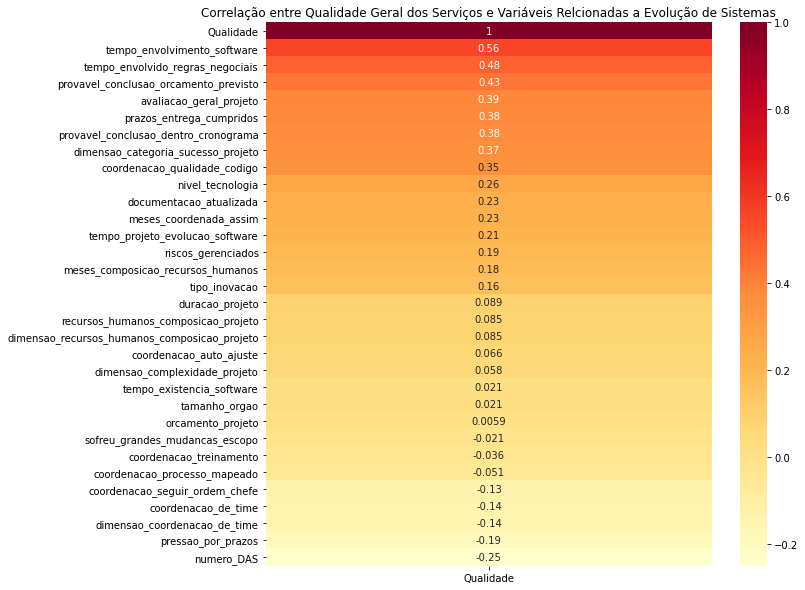

In [ ]:
df_corr = df_apenas_match.corr(method='spearman')
x = df_corr[['Qualidade']].sort_values(by='Qualidade', ascending=False)
#x = corr[['A']]
plt.figure(figsize=(10,10))
plt.title('Correlação entre Qualidade Geral dos Serviços e Variáveis Relcionadas a Evolução de Sistemas')
sns.heatmap(x,cmap='YlOrRd', annot=True)
x

In [ ]:

var1 = 'Qualidade'
correlacao_variaveis(df_apenas_match, var1, 'tempo_envolvimento_software')
print(regua)
correlacao_variaveis(df_apenas_match, var1, 'tempo_envolvido_regras_negociais')
print(regua)
correlacao_variaveis(df_apenas_match, var1, 'coordenacao_qualidade_codigo')
print(regua)
correlacao_variaveis(df_apenas_match, var1, 'provavel_conclusao_orcamento_previsto')
print(regua)
correlacao_variaveis(df_apenas_match, var1, 'prazos_entrega_cumpridos')

# 'tempo_envolvimento_software', 'tempo_envolvido_regras_negociais'

Relação entre  Qualidade  e  tempo_envolvimento_software
correlação: 0.5586, p-valor: 0.0069
Relação entre  Qualidade  e  tempo_envolvido_regras_negociais
correlação: 0.4843, p-valor: 0.0224
Relação entre  Qualidade  e  coordenacao_qualidade_codigo
correlação: 0.3518, p-valor: 0.1084
Relação entre  Qualidade  e  provavel_conclusao_orcamento_previsto
correlação: 0.4333, p-valor: 0.0440
Relação entre  Qualidade  e  prazos_entrega_cumpridos
correlação: 0.3806, p-valor: 0.0806


In [ ]:
df_apenas_match['categ_qualidade'] = pd.qcut( df_apenas_match['Qualidade'], 2, [0,1]).astype('int').to_numpy()

In [ ]:
plt.figure(figsize=(30,10))
fig = px.scatter_3d(df_apenas_match, x='dimensao_coordenacao_de_time', y='dimensao_recursos_humanos_composicao_projeto', z='dimensao_complexidade_projeto', color='categ_qualidade' , color_continuous_scale='earth'  ) #, )symbol='tipo_inovacao'
fig.update_traces(marker={'size': 3})                    

fig.show()

<Figure size 2160x720 with 0 Axes>

In [ ]:
#dimensao_coordenacao_de_time
#dimensao_complexidade_projeto
plt.figure(figsize=(30,10))
fig = px.scatter_3d(df_apenas_match, x='dimensao_categoria_sucesso_projeto', y='dimensao_recursos_humanos_composicao_projeto', z='dimensao_complexidade_projeto', color='categ_qualidade' , color_continuous_scale='earth'  ) #, )symbol='tipo_inovacao'
fig.update_traces(marker={'size': 3})                    

fig.show()

<Figure size 2160x720 with 0 Axes>

In [ ]:
df_apenas_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Qualidade                                     22 non-null     float64
 1   tamanho_orgao                                 22 non-null     int64  
 2   tempo_envolvido_regras_negociais              22 non-null     int64  
 3   tempo_envolvimento_software                   22 non-null     int64  
 4   tempo_existencia_software                     22 non-null     int64  
 5   tempo_projeto_evolucao_software               22 non-null     int64  
 6   prazos_entrega_cumpridos                      22 non-null     int64  
 7   provavel_conclusao_dentro_cronograma          22 non-null     int64  
 8   provavel_conclusao_orcamento_previsto         22 non-null     int64  
 9   sofreu_grandes_mudancas_escopo                22 non-null     int64

Interpretando ρ

    0.9 para mais ou para menos indica uma correlação muito forte.
    0.7 a 0.9 positivo ou negativo indica uma correlação forte.
    0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
    0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
    0 a 0.3 positivo ou negativo indica uma correlação desprezível.


In [ ]:
df_gestores_TI_filled2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            128 non-null    int64  
 1   area                                          128 non-null    object 
 2   orgao                                         128 non-null    object 
 3   software                                      128 non-null    object 
 4   tamanho_orgao                                 128 non-null    int32  
 5   tempo_envolvido_regras_negociais              128 non-null    int32  
 6   tempo_envolvimento_software                   128 non-null    int32  
 7   tempo_existencia_software                     128 non-null    int32  
 8   tempo_projeto_evolucao_software               128 non-null    int32  
 9   prazos_entrega_cumpridos                      128 non-null    int

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

<h2> Download da tabela de matches e da de gestores de TI </h2>

In [ ]:
from google.colab import files

In [ ]:
df_gestores_TI_filled2.to_excel("df_gestores_TI_filled2.xlsx")  
files.download('df_gestores_TI_filled2.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_apenas_match

Qualidade  ...  categ_qualidade
0        -0.5  ...                0
1         1.0  ...                0
2         0.5  ...                0
3        -1.5  ...                0
4         2.0  ...                1
5         0.5  ...                0
6         2.0  ...                1
7         2.0  ...                1
8         2.0  ...                1
9         0.0  ...                0
10        0.0  ...                0
11        1.0  ...                0
12        1.0  ...                0
13        1.0  ...                0
14        1.0  ...                0
15        1.0  ...                0
16        1.0  ...                0
17        0.0  ...                0
18        2.0  ...                1
19        0.0  ...                0
20        0.2  ...                0
21        0.5  ...                0

[22 rows x 33 columns]

In [ ]:
df_apenas_match.to_excel("matches.xlsx")  
files.download('matches.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h2> Testando regressão logística dos construtos, conforme referencial teórico</h2>

In [ ]:
df_gestores_TI_filled2['categoria_prazos_entrega_cumpridos'] = pd.qcut( df_gestores_TI_filled2['prazos_entrega_cumpridos'], 2, [0,1]).astype('int')

In [ ]:
# , x='dimensao_coordenacao_de_time', y='dimensao_recursos_humanos_composicao_projeto', z='dimensao_complexidade_projeto',
X = df_gestores_TI_filled2[[ 'dimensao_categoria_sucesso_projeto','dimensao_coordenacao_de_time','dimensao_recursos_humanos_composicao_projeto','dimensao_complexidade_projeto']].to_numpy()
Y = df_gestores_TI_filled2[['categoria_prazos_entrega_cumpridos']].to_numpy()[:,0]
#'dimensao_categoria_sucesso_projeto', 'dimensao_coordenacao_de_time', 'dimensao_complexidade_projeto','dimensao_recursos_humanos_composicao_projeto','recursos_humanos_composicao_projeto'],

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25) #, stratify=df_gestores_TI_filled2[['dimensao_categoria_sucesso_projeto']])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
model = LogisticRegression(C=0.3,solver='liblinear',  random_state=0, verbose=1)
model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [ ]:
Y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# coeficientes 

#print('posicao_frase','presenca_de_considerando','soma_ocur_chave','expressao_uso_atribuicoes','conta_expressao_final_preambulo')
print(model.coef_)

#intercept_ : onde intercepta a linha de Y.

print(model.intercept_)

[[ 0.63147511  0.06674599  0.21110186 -0.02960145]]
[-1.82359648]


In [ ]:
X_test = scaler.transform(X)
resultado = model.predict(X)

In [ ]:
resultado

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print (pd.crosstab(Y,resultado, rownames=['Real'], colnames=['Predito'], margins=True))


Predito    0  All
Real             
0        117  117
1         11   11
All      128  128


<h2> Testando regressão logistica com as variáveis tempo_envolvimento_software, tempo_envolvido_regras_negociais, provavel_conclusao_orcamento_previsto, prazos_entrega_cumpridos APENAS COM OS MATCHES</h2>


In [ ]:
X =  df_apenas_match[[ 'tempo_envolvimento_software','tempo_envolvido_regras_negociais','provavel_conclusao_orcamento_previsto','prazos_entrega_cumpridos']].to_numpy()
Y =  pd.qcut( df_apenas_match['Qualidade'], 2, [0,1]).astype('int').to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#import prince

In [ ]:
#plt.figure(figsize=(30,10))
#sns.heatmap(df_gestores_TI_filled2.corr(method='spearman'),cmap='YlOrRd', annot=True)
df_gestoresTI3

NameError: ignored

In [ ]:
df_gestoresTI3 = df_gestores_TI_filled2[['prazos_entrega_cumpridos','categoria_prazos_entrega_cumpridos','dimensao_coordenacao_de_time','dimensao_recursos_humanos_composicao_projeto','nivel_tecnologia','tipo_inovacao','dimensao_complexidade_projeto']].copy()
#df_gestoresTI3 = df_gestoresTI3.set_index('categoria_prazos_entrega_cumpridos')
#df_gestoresTI3 = df_gestoresTI3+3
df_gestoresTI3

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
# coeficientes 

#print('posicao_frase','presenca_de_considerando','soma_ocur_chave','expressao_uso_atribuicoes','conta_expressao_final_preambulo')
print(model.coef_)

#intercept_ : onde intercepta a linha de Y.

print(model.intercept_)

In [ ]:
X_test = scaler.transform(X)
resultado = model.predict(X)

In [ ]:
resultado

In [ ]:
print (pd.crosstab(Y,resultado, rownames=['Real'], colnames=['Predito'], margins=True))


<h2> Analise Combinatória</h2>

In [ ]:
!pip install prince
import prince

In [ ]:
# import prince
df_gestoresTI3 = df_gestoresTI3+3
ca = prince.CA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42)

#df_gestoresTI3.columns.rename('variaveis', inplace=True)
#df_gestoresTI3.index.rename('categoria_prazos_entrega_cumpridos', inplace=True)

ca = ca.fit(df_gestoresTI3)

In [ ]:
plt.figure(figsize=(30,10))
ca.plot_coordinates(df_gestoresTI3);
plt.show()